<a href="https://colab.research.google.com/github/arifwidiasan/Lexicon-CNN-Kanjuruhan/blob/master/Lexicon_based_Sentiment_Analysis_Kanjuruhan_Disaster_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Package**

In [ ]:
import pandas as pd
# Import some libraries

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

!pip install twint
import twint
import nest_asyncio
nest_asyncio.apply()


import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

!pip install keras_preprocessing

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.8/412.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33911 sha256=b4042b2889b2afc924e88154ca1ed148fbf849f28af897eedf92786f66dba011
  Stored in directory: /root/.cache/pip/wheels/48/d2/f5/7a71ea8b6788b85fac82abf4ef84dac03562571f695c3b8f77
  Created wheel for cchardet: filename=cchardet-2.1.7-cp310-cp310-linux_x86_64.whl size=289361 sha256=3ab62ccbb01ab8415a0d728eacae887bad982ba792a9f25f040a29f5e4cd10aa
  Stored in directory: /root/.cache/pip/wheels/

In [ ]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# from pywsd.utils import lemmatize_sentence

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

# Deep Learing Preprocessing - Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

# Deep Learning Model - Keras
from keras.models import Model
from keras.models import Sequential

# Deep Learning Model - Keras - CNN
from keras.layers import Conv1D, Conv2D, Convolution1D, MaxPooling1D, SeparableConv1D, SpatialDropout1D, \
    GlobalAvgPool1D, GlobalMaxPool1D, GlobalMaxPooling1D
#from keras.layers.pooling import _GlobalPooling1D
from keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D

from keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D



# Deep Learning Model - Keras - RNN
from keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import LeakyReLU, PReLU, Lambda, Multiply



# Deep Learning Parameters - Keras
from keras.optimizers import RMSprop, Adam

# Deep Learning Callbacs - Keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sentiment_dict_negatif = pd.read_csv('https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv', delimiter='\t')
sentiment_dict_negatif = dict(zip(sentiment_dict_negatif['word'], sentiment_dict_negatif['weight']))

In [ ]:
sentiment_dict_positif = pd.read_csv('https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv', delimiter='\t')
sentiment_dict_positif = dict(zip(sentiment_dict_positif['word'], sentiment_dict_positif['weight']))

In [ ]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:
        return 'Date today: %s' % datetime.date.today()

# **All dataset and Apply Lexicon**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/preprocessed_tragedi-kanjuruhan_tweet_dataset_cleaned_null_dupe.csv', lineterminator='\n')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213635 entries, 0 to 213634
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   no                  213635 non-null  int64 
 1   date                213635 non-null  object
 2   content             213635 non-null  object
 3   username            213635 non-null  object
 4   displayname         213617 non-null  object
 5   follower            213635 non-null  int64 
 6   user created        213635 non-null  object
 7   lang                213635 non-null  object
 8   url                 213635 non-null  object
 9   tweet_cleaned       213635 non-null  object
 10  preprocessed_tweet  213635 non-null  object
dtypes: int64(2), object(9)
memory usage: 17.9+ MB


In [ ]:
def calculate_sentiment_score(tweet, sentiment_dict):
    score = 0
    word_list = tweet.split(',')
    for word in word_list:
        if word in sentiment_dict:
            #print(word)
            score += sentiment_dict[word]
    return score

In [ ]:
def label_tweets(row, sentiment_dict_positif, sentiment_dict_negatif, threshold):
    tweet = row['preprocessed_tweet']
    score_p = calculate_sentiment_score(tweet, sentiment_dict_positif)
    score_n = calculate_sentiment_score(tweet, sentiment_dict_negatif)
    score = score_p + score_n
    global count
    count += 1
    if count%1000==0:
      print(count, end ="\n")
    if score > threshold:
        #return 'positif'
        return 1
    elif score < threshold:
        #return 'negatif'
        return 2
    else:
        #return 'netral'
        return 0

In [ ]:
count = 0
threshold = 0
df['sentimen'] = df.apply(lambda row: label_tweets(row, sentiment_dict_positif, sentiment_dict_negatif, threshold), axis=1)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [ ]:
df.head(5)

,no,date,content,username,displayname,follower,user created,lang,url,tweet_cleaned,preprocessed_tweet,sentimen
0,1,2022-10-01 00:00:28+00:00,#AremaDay #NganemDay\n\nIni kandang kita\n\n⚽ ...,AremaniaMilitan,AREMANIA MILITAN,68,2019-10-17 18:18:42+00:00,in,https://twitter.com/AremaniaMilitan/status/157...,ini kandang kita arema fc vs persebaya s...,"kandang,arema,fc,vs,baya,sabtu,oktober,kick,of...",1
1,2,2022-10-01 00:03:56+00:00,@GateJhoner21 Kanjuruhan cak duduk kanzooruhan...,hadi_11bsk,#USUTTUNTAS,91,2015-11-23 13:35:15+00:00,in,https://twitter.com/hadi_11bsk/status/15759999...,kanjuruhan cak duduk kanzooruhan,"kanjuruhan,cak,duduk,kanzooruhan",0
2,3,2022-10-01 00:21:33+00:00,@Dirty27_ Lha mosok mek gara gara omongane man...,daryanpratama_,Tacibay,35,2021-06-22 09:18:35+00:00,in,https://twitter.com/daryanpratama_/status/1576...,lha mosok mek gara gara omongane mantan pemai...,"lha,mosok,mek,gara,gara,omongane,mantan,main,k...",2
3,4,2022-10-01 00:28:21+00:00,"Jogo Perdamaian, Jogo Kanjuruhan\n\n#Malang\n#...",samaptaresma,Samaptapolresmalang,68,2022-04-22 08:53:12+00:00,in,https://twitter.com/samaptaresma/status/157600...,jogo perdamaian jogo kanjuruhan,"jogo,damai,jogo,kanjuruhan",0
4,5,2022-10-01 01:01:29+00:00,RAYAKAN #PERSEBAYADAY\n\n🏆: BRI Liga 1 2022/20...,persebayaupdate,Official Persebaya,495411,2017-01-08 06:44:42+00:00,in,https://twitter.com/persebayaupdate/status/157...,rayakan bri liga matchday arema fc vs p...,"raya,bri,liga,matchday,arema,fc,vs,baya,sabtu,...",2


In [ ]:
sentiment_count = df['sentimen'].value_counts()
print(sentiment_count)

2    172601
1     27253
0     13781
Name: sentimen, dtype: int64


In [ ]:
df['preprocessed_tweet'][5]
#print(df['preprocessed_tweet'])

'baya,surabaya,tandang,markas,arema,fc,stadion,kanjuruhan,kabupaten,malang,sabtu'

In [ ]:
df['token'] = df['preprocessed_tweet'].str.split(',')

In [ ]:
df['token'][5]

['baya',
 'surabaya',
 'tandang',
 'markas',
 'arema',
 'fc',
 'stadion',
 'kanjuruhan',
 'kabupaten',
 'malang',
 'sabtu']

In [ ]:
print(df['token'][5])

['baya', 'surabaya', 'tandang', 'markas', 'arema', 'fc', 'stadion', 'kanjuruhan', 'kabupaten', 'malang', 'sabtu']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213635 entries, 0 to 213634
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   no                  213635 non-null  int64 
 1   date                213635 non-null  object
 2   content             213635 non-null  object
 3   username            213635 non-null  object
 4   displayname         213617 non-null  object
 5   follower            213635 non-null  int64 
 6   user created        213635 non-null  object
 7   lang                213635 non-null  object
 8   url                 213635 non-null  object
 9   tweet_cleaned       213635 non-null  object
 10  preprocessed_tweet  213635 non-null  object
 11  sentimen            213635 non-null  int64 
 12  token               213635 non-null  object
dtypes: int64(3), object(10)
memory usage: 21.2+ MB


# **Analisa Kata**

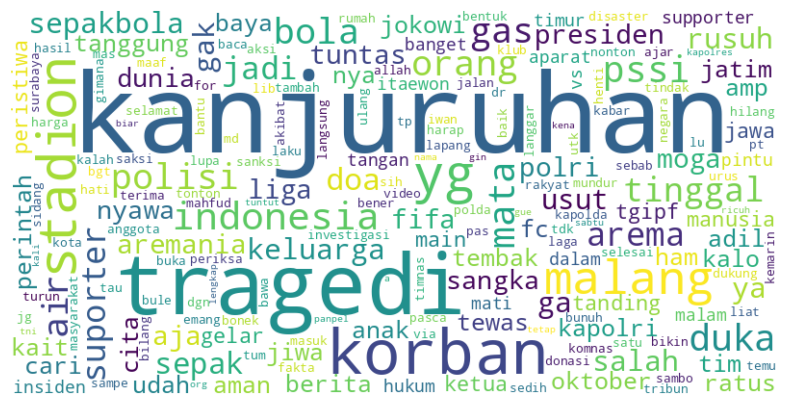

In [ ]:
# Menggabungkan semua token dari seluruh kolom
all_tokens = []
for tokens_list in df['token']:
    all_tokens.extend(tokens_list)

# Menghitung kemunculan setiap kata
word_count = {}
for token in all_tokens:
    if token in word_count:
        word_count[token] += 1
    else:
        word_count[token] = 1

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
word_count['rumah']

2750

In [ ]:
# Kata yang ingin Anda cari
kata_cari = 'kanjuruhan'

# Mencari baris yang mengandung kata yang Anda cari
result = df[df['token'].apply(lambda x: any(kata_cari in token for token in x))]

# Tampilkan hasilnya
result

,no,date,content,username,displayname,follower,user created,lang,url,tweet_cleaned,preprocessed_tweet,sentimen,token
0,1,2022-10-01 00:00:28+00:00,#AremaDay #NganemDay\n\nIni kandang kita\n\n⚽ ...,AremaniaMilitan,AREMANIA MILITAN,68,2019-10-17 18:18:42+00:00,in,https://twitter.com/AremaniaMilitan/status/157...,ini kandang kita arema fc vs persebaya s...,"kandang,arema,fc,vs,baya,sabtu,oktober,kick,of...",1,"[kandang, arema, fc, vs, baya, sabtu, oktober,..."
1,2,2022-10-01 00:03:56+00:00,@GateJhoner21 Kanjuruhan cak duduk kanzooruhan...,hadi_11bsk,#USUTTUNTAS,91,2015-11-23 13:35:15+00:00,in,https://twitter.com/hadi_11bsk/status/15759999...,kanjuruhan cak duduk kanzooruhan,"kanjuruhan,cak,duduk,kanzooruhan",0,"[kanjuruhan, cak, duduk, kanzooruhan]"
2,3,2022-10-01 00:21:33+00:00,@Dirty27_ Lha mosok mek gara gara omongane man...,daryanpratama_,Tacibay,35,2021-06-22 09:18:35+00:00,in,https://twitter.com/daryanpratama_/status/1576...,lha mosok mek gara gara omongane mantan pemai...,"lha,mosok,mek,gara,gara,omongane,mantan,main,k...",2,"[lha, mosok, mek, gara, gara, omongane, mantan..."
3,4,2022-10-01 00:28:21+00:00,"Jogo Perdamaian, Jogo Kanjuruhan\n\n#Malang\n#...",samaptaresma,Samaptapolresmalang,68,2022-04-22 08:53:12+00:00,in,https://twitter.com/samaptaresma/status/157600...,jogo perdamaian jogo kanjuruhan,"jogo,damai,jogo,kanjuruhan",0,"[jogo, damai, jogo, kanjuruhan]"
4,5,2022-10-01 01:01:29+00:00,RAYAKAN #PERSEBAYADAY\n\n🏆: BRI Liga 1 2022/20...,persebayaupdate,Official Persebaya,495411,2017-01-08 06:44:42+00:00,in,https://twitter.com/persebayaupdate/status/157...,rayakan bri liga matchday arema fc vs p...,"raya,bri,liga,matchday,arema,fc,vs,baya,sabtu,...",2,"[raya, bri, liga, matchday, arema, fc, vs, bay..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213630,215173,2023-02-15 23:40:00+00:00,@fatihfathryan @naturalman27 @adit_cihuy @Fakt...,Fathorz_sii15,Zunsx,5,2019-08-13 15:57:15+00:00,in,https://twitter.com/Fathorz_sii15/status/16260...,dan sty ini dari di kontrak waktunya aja ...,"sty,kontrak,aja,ga,pas,krna,trjadi,covid,shg,k...",1,"[sty, kontrak, aja, ga, pas, krna, trjadi, cov..."
213631,215174,2023-02-15 23:40:39+00:00,@AremaStats @jokowi @mohmahfudmd Kl menurut su...,fariz_chamim,Fariz Chamim,1027,2010-06-16 16:47:31+00:00,in,https://twitter.com/fariz_chamim/status/162600...,kl menurut sudut pandang saya hukum uda jal...,"kl,sudut,pandang,hukum,uda,jalan,sidi,tetap,te...",1,"[kl, sudut, pandang, hukum, uda, jalan, sidi, ..."
213632,215175,2023-02-15 23:43:35+00:00,Puluhan Brimob terliha meneriaki Hakim di Sida...,suaradotcom,suaradotcom,28850,2014-02-12 10:59:31+00:00,in,https://twitter.com/suaradotcom/status/1626004...,puluhan brimob terliha meneriaki hakim di sida...,"puluh,brimob,terliha,riak,hakim,sidang,kanjuru...",2,"[puluh, brimob, terliha, riak, hakim, sidang, ..."
213633,215176,2023-02-15 23:48:33+00:00,"@xy_sft Wkwk yo kui, ning sleman raono tandem ...",Radenjati13,𝓡𝓪𝔂𝔂𝓭𝓮𝓷,237,2017-07-18 11:07:09+00:00,in,https://twitter.com/Radenjati13/status/1626005...,wkwk yo kui ning sleman raono tandem e pas ol...,"wkwk,yo,kui,ning,sleman,raono,tandem,e,pas,str...",2,"[wkwk, yo, kui, ning, sleman, raono, tandem, e..."


In [ ]:
# Menghapus kata  dari setiap elemen dalam kolom 'token'
del_token = ['amp', 'malang', 'yg', 'yang', 'jg', 'juga', 'dr', 'dari', 'dgn', 'dengan', 'tapi', 'sambo', 'utk', 'nya', 'tp']
for kata in del_token:
  df['token'] = df['token'].apply(lambda x: [word for word in x if word != kata])

In [ ]:
# Mengganti kata dengan x dalam setiap elemen list
replace_dic = {
    'gin': 'begini',
    'baya': 'persebaya',
    'allah': 'tuhan',
    'bgt': 'banget',
    'emang': 'memang',
    'ajg': 'anjing',
    'bgst': 'bangsat',
    'tdk': 'tidak',
    'kalo': 'kalau',
    'kl': 'kalau',
    'org': 'orang',
    'pray': 'doa',
    'gw': 'saya',
    'gue': 'saya',
    'udah': 'sudah'
}

for kunci, nilai in replace_dic.items():
    df['token'] = df['token'].apply(lambda x: [nilai if word == kunci else word for word in x])

In [ ]:
df['token'][5]

['persebaya',
 'surabaya',
 'tandang',
 'markas',
 'arema',
 'fc',
 'stadion',
 'kanjuruhan',
 'kabupaten',
 'sabtu']

In [ ]:
df['token'][118]

['kanjuruhan']

In [ ]:
# Fungsi kustom untuk menghapus kata-kata dengan 1 atau 2 huruf
def hapus_kata_pendek(tokens):
    return [kata for kata in tokens if len(kata) > 2]

# Menggunakan apply untuk menerapkan fungsi di atas pada kolom 'token'
#df['token'] = df['token'].apply(hapus_kata_pendek)

In [ ]:
df['token'][5]

['persebaya',
 'surabaya',
 'tandang',
 'markas',
 'arema',
 'fc',
 'stadion',
 'kanjuruhan',
 'kabupaten',
 'sabtu']

In [ ]:
df['token'][118]

['kanjuruhan']

In [ ]:
#mengambil data tweet setelah pertandingan selesai yaitu 1 oktober 2022 sekitar pukul 22.00
df['date'] = pd.to_datetime(df['date'])

# Tentukan tanggal dan waktu batas yang ingin Anda pertahankan
tanggal_batas = pd.to_datetime('2022-10-01 22:00:00+00:00')

# Filter DataFrame untuk hanya menyertakan baris yang sesuai dengan kriteria tanggal dan waktu
df = df[df['date'] >= tanggal_batas]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208715 entries, 4920 to 213634
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   no                  208715 non-null  int64              
 1   date                208715 non-null  datetime64[ns, UTC]
 2   content             208715 non-null  object             
 3   username            208715 non-null  object             
 4   displayname         208698 non-null  object             
 5   follower            208715 non-null  int64              
 6   user created        208715 non-null  object             
 7   lang                208715 non-null  object             
 8   url                 208715 non-null  object             
 9   tweet_cleaned       208715 non-null  object             
 10  preprocessed_tweet  208715 non-null  object             
 11  sentimen            208715 non-null  int64              
 12  token        

# **Reapply Lexicon (if using analisa kata)**

In [ ]:
def calculate_new_sentiment_score(tokens, sentiment_dict):
    score = 0
    for token_item in tokens:
        if token_item in sentiment_dict:
            #print(token_item)
            score += sentiment_dict[token_item]
    return score

In [ ]:
def label_tweets(row, sentiment_dict_positif, sentiment_dict_negatif, threshold):
    tweet = row['token']
    score_p = calculate_new_sentiment_score(tweet, sentiment_dict_positif)
    score_n = calculate_new_sentiment_score(tweet, sentiment_dict_negatif)
    score = score_p + score_n
    global count
    count += 1
    if count%1000==0:
      print(count, end ="\n")
    if score > threshold:
        #return 'positif'
        return 1
    elif score < threshold:
        #return 'negatif'
        return 2
    else:
        #return 'netral'
        return 0

In [ ]:
count = 0
threshold = 0
df['sentimen_new'] = df.apply(lambda row: label_tweets(row, sentiment_dict_positif, sentiment_dict_negatif, threshold), axis=1)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [ ]:
sentiment_count = df['sentimen'].value_counts()
print(sentiment_count)

2    168715
1     26698
0     13302
Name: sentimen, dtype: int64


In [ ]:
sentiment_count = df['sentimen_new'].value_counts()
print(sentiment_count)

2    165456
1     29051
0     14208
Name: sentimen_new, dtype: int64


# **Rebalance Data (if using all dataset)**

In [ ]:
# Mengambil 10 ribu data secara acak untuk nilai 0, 1, dan 2
data_0 = df[df['sentimen_new'] == 0].head(10000)
data_1 = df[df['sentimen_new'] == 1].head(10000)
data_2 = df[df['sentimen_new'] == 2].head(10000)

# Menggabungkan DataFrame hasil seleksi di atas
df = pd.concat([data_0, data_1, data_2])

# **Training (split)**

In [ ]:
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
# Make text preprocessed (tokenized) to untokenized with toSentence Function
X = df['token'].apply(toSentence)
max_features = 5000

max_words = len(set(" ".join(X).split()))
max_len = X.apply(lambda x: len(x)).max()
print(max_words,max_len)

# Tokenize text with specific maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

21361 281


(30000, 39)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['sentimen_new'], test_size=0.1, random_state=65)

In [ ]:
# Normalize X train and test
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train_normalized = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
#X_test_normalized = scaler.fit_transform(X_test.reshape(-1, 1)).reshape(X_test.shape)

In [ ]:
import tensorflow as tf

# Mengubah label menjadi one-hot encoding
num_classes = 3
y_train_encode = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_encode = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
X_train.shape

(27000, 39)

In [ ]:
loss = 'categorical_crossentropy'
# loss = 'binary_crossentropy'
metrics = ['accuracy']

In [ ]:
def get_cnn_model(num_class=3):
    model = Sequential()

    model.add(Embedding(max_words, 100, input_length=X_train.shape[1]))
    model.add(Dropout(0.4))

    model.add(Conv1D(256, 3, padding='valid', activation='relu', strides=1))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))
    #model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))

    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))

    model.summary()
    return model

In [ ]:
learning_rate = 0.001
epochs = 5

# **Training 1**

In [ ]:
num_class = 3
model2 = get_cnn_model(num_class=num_class)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 39, 100)           2136100   
                                                                 
 dropout_12 (Dropout)        (None, 39, 100)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 37, 256)           77056     
                                                                 
 flatten_6 (Flatten)         (None, 9472)              0         
                                                                 
 dense_24 (Dense)            (None, 32)                303136    
                                                                 
 dense_25 (Dense)            (None, 64)                2112      
                                                                 
 dense_26 (Dense)            (None, 128)              

In [ ]:
from keras.callbacks import ReduceLROnPlateau
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
batch_size = 128
#validation_split = 0.2
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.000001)

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train,
    y_train_encode,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose
    #validation_split=validation_split
    #callbacks=[reduce_lr]
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2023-12-20 13:41:59


Compliling Model ...

Trainning Model ...

Epoch 1/5
211/211 [==============================] - 21s 96ms/step - loss: 0.7368 - accuracy: 0.6529
Epoch 2/5
211/211 [==============================] - 21s 101ms/step - loss: 0.3908 - accuracy: 0.8366
Epoch 3/5
211/211 [==============================] - 22s 102ms/step - loss: 0.2828 - accuracy: 0.8864
Epoch 4/5
211/211 [==============================] - 21s 98ms/step - loss: 0.2275 - accuracy: 0.9092
Epoch 5/5
211/211 [==============================] - 20s 94ms/step - loss: 0.1873 - accuracy: 0.9262

Elapsed Time: 00:01:44
Completed Model Trainning Timestamp: 2023-12-20 13:43:44


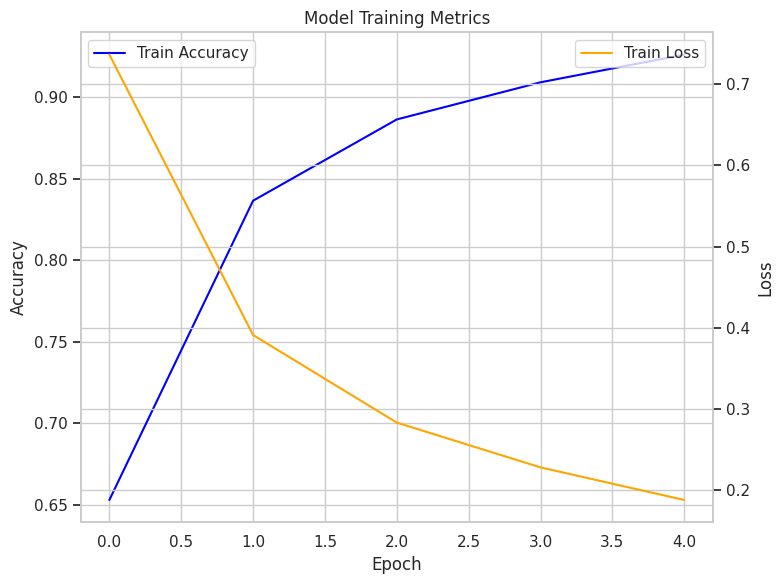

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot train accuracy
ax.plot(history2.history['accuracy'], label='Train Accuracy', color='blue')
ax.set_title('Model Training Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc='upper left')

# Create a secondary y-axis for train loss
ax2 = ax.twinx()
ax2.plot(history2.history['loss'], label='Train Loss', color='orange')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained the model and have training data (X_train, y_train_encode)
y_train_pred = model2.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)  # Convert softmax outputs to class labels

# Convert one-hot encoded labels back to class labels
y_train_true_classes = np.argmax(y_train_encode, axis=1)

# Calculate and print classification report for training data
class_report_train = classification_report(y_train_true_classes, y_train_pred_classes, digits=4)
print("Classification Report (Training Data):\n", class_report_train)

844/844 [==============================] - 7s 9ms/step
Classification Report (Training Data):
               precision    recall  f1-score   support

           0     0.9723    0.9159    0.9433      8941
           1     0.9249    0.9823    0.9527      9000
           2     0.9908    0.9864    0.9886      9059

    accuracy                         0.9617     27000
   macro avg     0.9627    0.9615    0.9615     27000
weighted avg     0.9627    0.9617    0.9616     27000



# **Test Data 1**

In [ ]:
# Assuming you have already trained the model and have training data (X_train, y_train_encode)
y_test_pred = model2.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Convert softmax outputs to class labels

# Convert one-hot encoded labels back to class labels
y_test_true_classes = np.argmax(y_test_encode, axis=1)

# Calculate and print classification report for training data
class_report_test = classification_report(y_test_true_classes, y_test_pred_classes, digits=4)
print("Classification Report (Test Data):\n", class_report_test)

94/94 [==============================] - 1s 6ms/step
Classification Report (Test Data):
               precision    recall  f1-score   support

           0     0.8570    0.8149    0.8354      1059
           1     0.8262    0.9030    0.8629      1000
           2     0.9633    0.9214    0.9419       941

    accuracy                         0.8777      3000
   macro avg     0.8822    0.8798    0.8801      3000
weighted avg     0.8801    0.8777    0.8780      3000



# **Training 2**

In [ ]:
num_class = 3
model2 = get_cnn_model(num_class=num_class)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 39, 100)           2136100   
                                                                 
 dropout_6 (Dropout)         (None, 39, 100)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 37, 256)           77056     
                                                                 
 flatten_3 (Flatten)         (None, 9472)              0         
                                                                 
 dense_12 (Dense)            (None, 32)                303136    
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
from keras.callbacks import ReduceLROnPlateau
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
batch_size = 128
#validation_split = 0.2
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.000001)

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train,
    y_train_encode,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose
    #validation_split=validation_split
    #callbacks=[reduce_lr]
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2023-12-20 10:11:35


Compliling Model ...

Trainning Model ...

Epoch 1/5
211/211 [==============================] - 13s 56ms/step - loss: 0.7544 - accuracy: 0.6408
Epoch 2/5
211/211 [==============================] - 12s 55ms/step - loss: 0.3801 - accuracy: 0.8416
Epoch 3/5
211/211 [==============================] - 12s 56ms/step - loss: 0.2836 - accuracy: 0.8855
Epoch 4/5
211/211 [==============================] - 12s 55ms/step - loss: 0.2316 - accuracy: 0.9072
Epoch 5/5
211/211 [==============================] - 13s 63ms/step - loss: 0.1900 - accuracy: 0.9266

Elapsed Time: 00:01:01
Completed Model Trainning Timestamp: 2023-12-20 10:12:36


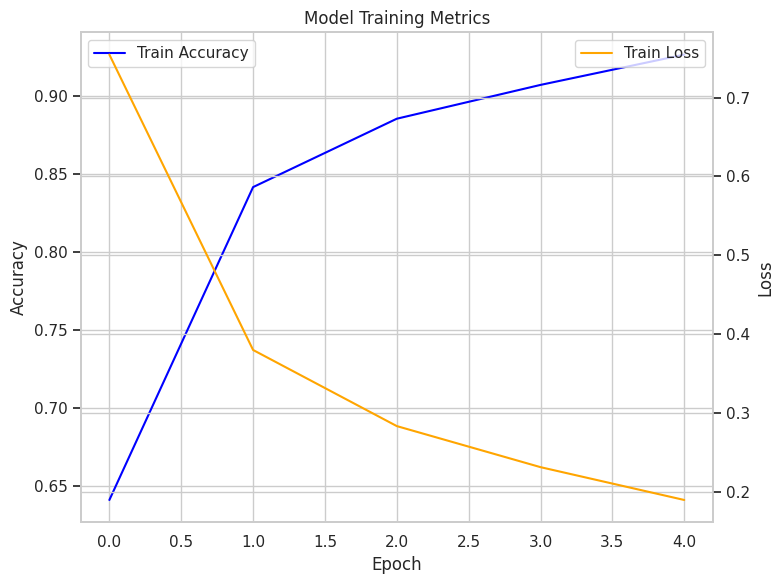

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot train accuracy
ax.plot(history2.history['accuracy'], label='Train Accuracy', color='blue')
ax.set_title('Model Training Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc='upper left')

# Create a secondary y-axis for train loss
ax2 = ax.twinx()
ax2.plot(history2.history['loss'], label='Train Loss', color='orange')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained the model and have training data (X_train, y_train_encode)
y_train_pred = model2.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)  # Convert softmax outputs to class labels

# Convert one-hot encoded labels back to class labels
y_train_true_classes = np.argmax(y_train_encode, axis=1)

# Calculate and print classification report for training data
class_report_train = classification_report(y_train_true_classes, y_train_pred_classes, digits=4)
print("Classification Report (Training Data):\n", class_report_train)

844/844 [==============================] - 4s 5ms/step
Classification Report (Training Data):
               precision    recall  f1-score   support

           0     0.9645    0.9255    0.9446      8941
           1     0.9595    0.9627    0.9611      9000
           2     0.9606    0.9957    0.9778      9059

    accuracy                         0.9614     27000
   macro avg     0.9615    0.9613    0.9612     27000
weighted avg     0.9615    0.9614    0.9612     27000



# **Test Data 2**

In [ ]:
# Assuming you have already trained the model and have training data (X_train, y_train_encode)
y_test_pred = model2.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Convert softmax outputs to class labels

# Convert one-hot encoded labels back to class labels
y_test_true_classes = np.argmax(y_test_encode, axis=1)

# Calculate and print classification report for training data
class_report_test = classification_report(y_test_true_classes, y_test_pred_classes, digits=4)
print("Classification Report (Test Data):\n", class_report_test)

94/94 [==============================] - 0s 4ms/step
Classification Report (Test Data):
               precision    recall  f1-score   support

           0     0.8460    0.7989    0.8218      1059
           1     0.8533    0.8550    0.8541      1000
           2     0.9088    0.9639    0.9355       941

    accuracy                         0.8693      3000
   macro avg     0.8694    0.8726    0.8705      3000
weighted avg     0.8681    0.8693    0.8682      3000



# **Training 3**

In [ ]:
num_class = 3
model2 = get_cnn_model(num_class=num_class)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 39, 100)           2136100   
                                                                 
 dropout_8 (Dropout)         (None, 39, 100)           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 37, 256)           77056     
                                                                 
 flatten_4 (Flatten)         (None, 9472)              0         
                                                                 
 dense_16 (Dense)            (None, 32)                303136    
                                                                 
 dense_17 (Dense)            (None, 64)                2112      
                                                                 
 dense_18 (Dense)            (None, 128)              

In [ ]:
from keras.callbacks import ReduceLROnPlateau
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

verbose = 1
batch_size = 128
#validation_split = 0.2
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.000001)

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train,
    y_train_encode,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose
    #validation_split=validation_split
    #callbacks=[reduce_lr]
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2023-12-20 10:12:43


Compliling Model ...

Trainning Model ...

Epoch 1/5
211/211 [==============================] - 12s 54ms/step - loss: 0.7215 - accuracy: 0.6640
Epoch 2/5
211/211 [==============================] - 12s 55ms/step - loss: 0.3755 - accuracy: 0.8416
Epoch 3/5
211/211 [==============================] - 12s 57ms/step - loss: 0.2753 - accuracy: 0.8894
Epoch 4/5
211/211 [==============================] - 12s 55ms/step - loss: 0.2187 - accuracy: 0.9125
Epoch 5/5
211/211 [==============================] - 12s 55ms/step - loss: 0.1790 - accuracy: 0.9313

Elapsed Time: 00:00:59
Completed Model Trainning Timestamp: 2023-12-20 10:13:42


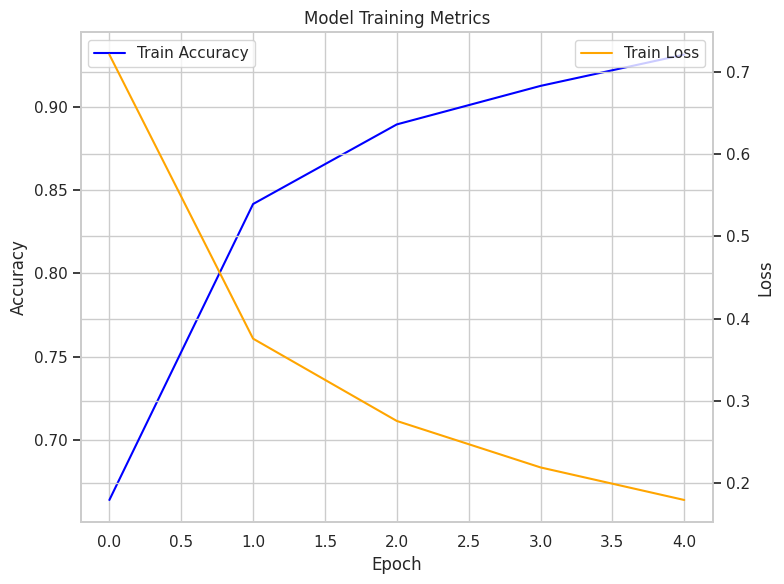

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot train accuracy
ax.plot(history2.history['accuracy'], label='Train Accuracy', color='blue')
ax.set_title('Model Training Metrics')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc='upper left')

# Create a secondary y-axis for train loss
ax2 = ax.twinx()
ax2.plot(history2.history['loss'], label='Train Loss', color='orange')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already trained the model and have training data (X_train, y_train_encode)
y_train_pred = model2.predict(X_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)  # Convert softmax outputs to class labels

# Convert one-hot encoded labels back to class labels
y_train_true_classes = np.argmax(y_train_encode, axis=1)

# Calculate and print classification report for training data
class_report_train = classification_report(y_train_true_classes, y_train_pred_classes, digits=4)
print("Classification Report (Training Data):\n", class_report_train)

844/844 [==============================] - 4s 4ms/step
Classification Report (Training Data):
               precision    recall  f1-score   support

           0     0.9768    0.9290    0.9523      8941
           1     0.9469    0.9771    0.9618      9000
           2     0.9784    0.9947    0.9865      9059

    accuracy                         0.9671     27000
   macro avg     0.9674    0.9669    0.9669     27000
weighted avg     0.9674    0.9671    0.9669     27000



# **Test Data 3**

In [ ]:
# Assuming you have already trained the model and have training data (X_train, y_train_encode)
y_test_pred = model2.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)  # Convert softmax outputs to class labels

# Convert one-hot encoded labels back to class labels
y_test_true_classes = np.argmax(y_test_encode, axis=1)

# Calculate and print classification report for training data
class_report_test = classification_report(y_test_true_classes, y_test_pred_classes, digits=4)
print("Classification Report (Test Data):\n", class_report_test)

94/94 [==============================] - 0s 5ms/step
Classification Report (Test Data):
               precision    recall  f1-score   support

           0     0.8617    0.7885    0.8235      1059
           1     0.8279    0.8850    0.8555      1000
           2     0.9304    0.9511    0.9406       941

    accuracy                         0.8717      3000
   macro avg     0.8733    0.8749    0.8732      3000
weighted avg     0.8720    0.8717    0.8709      3000

